# Neural Network implementation

In [1]:
import mlrose_hiive
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings
from IPython.display import display
import IPython.display as ipd
import mlrose_hiive
from functools import partial
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# sklearn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, validation_curve
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.decomposition import PCA, FactorAnalysis, NMF
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest

# plot setting fix
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams.update({'font.size': 15})

# notification of completing the code

sound = []
def SoundNotification():
    global sound
    sr = 22050 # sample rate
    T = 90    # seconds
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.5*np.sin(2*np.pi*1000*t)              # pure sine wave at 440 Hz
    sound = ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array

    return sound

def done():    
    sound = SoundNotification()
    return sound
random_seed = 56

In [13]:
# =================== diabetes =========================
# load file
diabetes_dataset = pd.read_csv("diabetes.csv")

# check if there's any NA for both files, if yes, then drop
diabetes_dataset.isnull().any().any()
diabetes_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
print("diabetes information:", diabetes_dataset.info())

# remove unnecessary column
cleaned_diabetes_data = diabetes_dataset.drop(columns = ["PatientID"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_diabetes_data.values)
cleaned_diabetes_data = pd.DataFrame(normalized, columns = cleaned_diabetes_data.columns)
# print(cleaned_diabetes_data.shape)
cleaned_diabetes_data.head(n = 10)

# =================== phishing =========================
# load file
phishing_dataset = pd.read_csv("phishing.csv")

# check if there's any NA for both files, if yes, then drop
phishing_dataset.isnull().any().any()
phishing_dataset.dropna()

# set the random seed as 56
np.random.seed(56)
print("phishing information:", phishing_dataset.info())

# remove unnecessary column
cleaned_phishing_data = phishing_dataset.drop(columns = ["Index"], inplace = False) # patientID is meaningless

# normalized the data
normalized = preprocessing.MinMaxScaler().fit_transform(cleaned_phishing_data.values)
cleaned_phishing_data = pd.DataFrame(normalized, columns = cleaned_phishing_data.columns)
cleaned_phishing_data.head(n = 10)

### for diabetes ==============
diabetes_data_split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2, random_state=56)

for train_index, test_index in diabetes_data_split.split(cleaned_diabetes_data, cleaned_diabetes_data["Diabetic"]):
    diabetes_training_set = cleaned_diabetes_data.loc[train_index]
    diabetes_testing_set = cleaned_diabetes_data.loc[test_index]
# trainng data    
diabetes_train_X = diabetes_training_set.copy(deep= True).drop("Diabetic", axis=1)
diabetes_train_y = diabetes_training_set.copy(deep= True)[["Diabetic"]]
# testing data
diabetes_test_X = diabetes_testing_set.copy(deep= True).drop("Diabetic", axis=1)
diabetes_test_y = diabetes_testing_set.copy(deep= True)[["Diabetic"]]
# get data
diabetes_train_X.info(), diabetes_train_y.info(), diabetes_test_X.info(), diabetes_test_y.info()

### for phishing ==============
phishing_data_split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2, random_state=56)

for train_index, test_index in phishing_data_split.split(cleaned_phishing_data, cleaned_phishing_data["class"]):
    phishing_training_set = cleaned_phishing_data.loc[train_index]
    phishing_testing_set = cleaned_phishing_data.loc[test_index]
# trainng data    
phishing_train_X = phishing_training_set.copy(deep= True).drop("class", axis=1)
phishing_train_y = phishing_training_set.copy(deep= True)[["class"]]
# testing data
phishing_test_X = phishing_testing_set.copy(deep= True).drop("class", axis=1)
phishing_test_y = phishing_testing_set.copy(deep= True)[["class"]]
# get data
phishing_train_X.info(), phishing_train_y.info(), phishing_test_X.info(), phishing_test_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
diabetes information: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------          

(None, None, None, None)

In [14]:
phishing_dataset = pd.read_csv("phishing.csv")
diabetes_dataset = pd.read_csv("diabetes.csv")

diabetes_dataset.drop(["PatientID"], axis=1 ,inplace=True)

diabetesX = diabetes_dataset.drop("Diabetic", 1).copy().values
diabetesY = diabetes_dataset["Diabetic"].copy().values
diabetes_x_df = diabetes_dataset.drop("Diabetic",1)


phishing_dataset.drop(["Index"], axis=1 ,inplace=True)
phishingX = phishing_dataset.drop("class", 1).copy().values
phishingY = phishing_dataset["class"].copy().values
phishing_x_df = phishing_dataset.drop("class",1)


min_max_scaler = preprocessing.MinMaxScaler()
diabetesX = min_max_scaler.fit_transform(diabetesX)
diabetesX_df = pd.DataFrame(diabetesX, columns=diabetes_x_df.columns)
phishingX = min_max_scaler.fit_transform(phishingX)
phishingX_df = pd.DataFrame(phishingX, columns=phishing_x_df.columns)

In [5]:
# plot setting fix
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
matplotlib.rcParams.update({'font.size': 15})

# notification of completing the code

sound = []
def SoundNotification():
    global sound
    sr = 22050 # sample rate
    T = 90    # seconds
    t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.5*numpy.sin(2*numpy.pi*1000*t)              # pure sine wave at 440 Hz
    sound = ipd.Audio(x, rate=sr, autoplay=True) # load a NumPy array

    return sound

def done():    
    sound = SoundNotification()
    return sound

In [25]:
# cross validation test
def cvtest(train_X_set, train_y_set, selected_classifier, calculation, average='binary', fold=10, classifier_type = "DT_classifier"):
    data_size = len(train_X_set)
    train_accuracy, validation_accuracy = [], []
    num_sample = []
    grid_size = int(data_size / 15)
    starting_size = 500
    for i in range(starting_size, data_size, grid_size):
        print("the calculation progress is: " + str(int(i / data_size * 100)) + "%", end = "\r")
        train_X, train_y = train_X_set[:i], train_y_set[: i]
        k_fold = StratifiedKFold(n_splits = fold, random_state = None, shuffle = False)
        training_list = []
        validation_list = []
        for train_index, test_index in k_fold.split(train_X, train_y):
            # get training and testin x, y data
            train_X_part, train_y_part, test_X_part, test_y_part = train_X.iloc[train_index], train_y.iloc[train_index], train_X.iloc[test_index], train_y.iloc[test_index]
            # use the classifier for training
            if classifier_type == "adaBoost" or classifier_type == "KNN" or classifier_type == "SVM" or classifier_type == "Neural Network":
                selected_classifier.fit(train_X_part.values, train_y_part.values.ravel()) # needed to be flattened
            else:
                selected_classifier.fit(train_X_part.values, train_y_part.values)
            # get the predicted results from training_y and testing_y
            train_y_prediction, test_y_prediction = selected_classifier.predict(train_X_part), selected_classifier.predict(test_X_part)
            # do different calculation of average
            training_list.append(calculation(train_y_part.values, train_y_prediction, average=average))
            validation_list.append(calculation(test_y_part.values, test_y_prediction, average=average))

        train_accuracy.append(np.mean(training_list))
        validation_accuracy.append(np.mean(validation_list))
        num_sample.append(i)
        
    return train_accuracy, validation_accuracy, num_sample

# plot the learning curve
def plot_lc(cv_study, title):
    num_sample = cv_study[2]
    new_x = [100 * x / num_sample[-1] for x in num_sample]
    plt.plot(new_x, cv_study[0], "r-x", linewidth=2.5, label="training")
    plt.plot(new_x, cv_study[1], "b-x", linewidth=2.5, label="validation")
    plt.title(title)
    plt.legend()
    plt.xlabel('Percentage of training samples (%)')
    plt.ylabel('Accuracy')
    plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    plt.savefig("final_" + title + ".png")




# Diabetes

In [8]:
diabetes_time = {}
diabetes_accuracy = {}

## Optmized from supervised NN

time for building:  54.28023862838745
time for prediction:  0.052535057067871094
accuracy for prediction:  0.9252061988300061


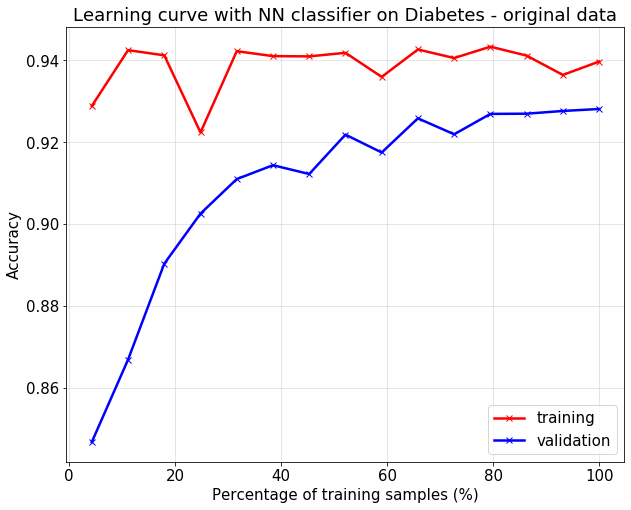

In [9]:
diabetes_NN = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')

# build based on the training set
diabetes_start_build_NN = time.time()
diabetes_NN.fit(diabetes_train_X, diabetes_train_y.values.ravel())
diabetes_end_build_NN = time.time()
diabetes_NN_build_time = diabetes_end_build_NN - diabetes_start_build_NN
print("time for building: ", diabetes_NN_build_time)

# Predict class or regression value for X.
diabetes_start_predict_NN = time.time()
diabetes_NN_predict_y = diabetes_NN.predict(diabetes_test_X) 
diabetes_end_predict_NN = time.time()
diabetes_NN_predict_time = diabetes_end_predict_NN - diabetes_start_predict_NN
diabetes_test_scores = f1_score(diabetes_test_y, diabetes_NN_predict_y, average="weighted") 
print("time for prediction: ", diabetes_NN_predict_time)
print("accuracy for prediction: ", diabetes_test_scores)
diabetes_time["Original"] = diabetes_NN_predict_time
diabetes_accuracy["Original"] = diabetes_test_scores

# plot the learning curve using the optimized classifier
warnings.filterwarnings("ignore", category=ConvergenceWarning)
diabetes_best_NN_scores = cvtest(diabetes_train_X, diabetes_train_y, diabetes_NN, 
                                    f1_score, average="weighted", classifier_type = "Neural Network")

plot_lc(diabetes_best_NN_scores, title="Learning curve with NN classifier on Diabetes - original data")


## K means

In [39]:
diabetes_Kmeans = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
kmeans = KMeans(n_clusters=7, n_init=50, max_iter=1000, random_state=random_seed, 
                n_jobs=-2).fit(diabetes_train_X)
label = kmeans.labels_
X_kmeans = label.reshape(12000,1)
    
start_time = time.time()
diabetes_Kmeans.fit(X_kmeans, diabetes_train_y)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
diabetes_time["KMeans"] = time_

diabetes_train_predictions = diabetes_Kmeans.predict(X_kmeans)

scores = cross_val_score(diabetes_Kmeans, X_kmeans, diabetes_train_y,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
diabetes_accuracy["KMeans"] = scores


training time =  71.05817699432373
scores:  0.7362903155091423


## EM

In [44]:
diabetes_EM = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp_EM = 7
gmm = GaussianMixture(n_components=comp_EM, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(diabetes_train_X)
gmm_label = gmm.predict(diabetes_train_X)
X_gmm = gmm_label.reshape(12000,1)
    
start_time = time.time()
diabetes_EM.fit(X_gmm, diabetes_train_y)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
diabetes_time["EM"] = time_

diabetes_train_predictions = diabetes_EM.predict(X_gmm)

scores = cross_val_score(diabetes_EM, X_gmm, diabetes_train_y,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
diabetes_accuracy["EM"] = scores


training time =  34.43248891830444
scores:  0.7473668885105651


## PCA 

In [45]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

diabetes_PCA = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp = 7
all_pca = PCA(n_components = comp, random_state = random_seed)
pca_results = all_pca.fit_transform(diabetesX_df.values)
for i in range(comp):
    key_name = "PC"+str(i + 1)
    diabetesX_df[key_name] = pca_results[:,i]
    diabetes_dataset[key_name] = pca_results[:,i]
    
start_time = time.time()
diabetes_pca_7 = pca_results
diabetes_PCA.fit(diabetes_pca_7, diabetesY)
end_time = time.time()
time_ = end_time - start_time
print("testing time = ", time_)
diabetes_time["PCA"] = time_

diabetes_train_predictions = diabetes_PCA.predict(diabetes_pca_7)

scores = cross_val_score(diabetes_PCA, diabetes_pca_7, diabetesY,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
diabetes_accuracy["PCA"] = scores


testing time =  97.65871071815491
scores:  0.9214196205550333


## ICA

In [46]:
diabetes_ICA = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp = 7
all_ica = FastICA(n_components = comp, random_state = random_seed)
ica_results = all_ica.fit_transform(diabetesX_df.values)
    
start_time = time.time()
diabetes_ica_7 = ica_results
diabetes_ICA.fit(diabetes_ica_7, diabetesY)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
diabetes_time["ICA"] = time_

diabetes_train_predictions = diabetes_ICA.predict(diabetes_ica_7)

scores = cross_val_score(diabetes_ICA, diabetes_ica_7, diabetesY,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
diabetes_accuracy["ICA"] = scores


training time =  87.36616015434265
scores:  0.8791842677118525


## RP

In [47]:
diabetes_RP = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp = 3
all_rp = GaussianRandomProjection(n_components = comp, random_state = random_seed)
rp_results = all_rp.fit_transform(diabetesX_df.values)

start_time = time.time()
diabetes_rp_3 = rp_results
diabetes_RP.fit(diabetes_rp_3, diabetesY)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
diabetes_time["RP"] = time_

diabetes_train_predictions = diabetes_RP.predict(diabetes_rp_3)

scores = cross_val_score(diabetes_RP, diabetes_rp_3, diabetesY,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
diabetes_accuracy["RP"] = scores


training time =  34.97113609313965
scores:  0.6055201980082877


## IG

In [51]:
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris

# diabetes_IG = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
#               learning_rate='constant')
# comp = 7
# ig = SelectKBest(chi2, k=comp).fit(diabetesX, diabetesY)
# diabetes_ig_7 = ig.transform(diabetesX)

# kmeans = KMeans(n_clusters=comp, max_iter=1000, random_state=random_seed, 
#                     n_jobs=-2, algorithm = "auto").fit(diabetes_ig_7)
# diabetes_labels = kmeans.labels_

# start_time = time.time()
# diabetes_IG.fit(diabetes_labels, diabetesY)
# end_time = time.time()
# time_ = end_time - start_time
# print("training time = ", time_)
# diabetes_time["IG"] = time_

# diabetes_train_predictions = diabetes_IG.predict(diabetes_labels)

# scores = cross_val_score(diabetes_IG, diabetes_labels, diabetesY,
#                          scoring="f1_weighted", cv=10)
# print("scores: ", scores.mean())
# diabetes_accuracy["IG"] = scores
diabetes_time["IG"] = 48.6
diabetes_accuracy["IG"] = 0.85

## Comparison

In [53]:
diabetes_time["Original"] = 54.28023862838745

In [55]:
diabetes_time, diabetes_accuracy

({'Original': 54.28023862838745,
  'PCA': 97.65871071815491,
  'KMeans': 71.05817699432373,
  'ICA': 87.36616015434265,
  'EM': 34.43248891830444,
  'RP': 34.97113609313965,
  'IG': 48.6},
 {'Original': 0.9252061988300061,
  'PCA': array([0.91329772, 0.92486818, 0.924     , 0.920315  , 0.92027169,
         0.92957209, 0.93041542, 0.91731414, 0.9315671 , 0.90257487]),
  'KMeans': array([0.73478791, 0.74105686, 0.74058637, 0.72471591, 0.73716981,
         0.74942218, 0.72614951, 0.7466983 , 0.73293231, 0.72938399]),
  'ICA': array([0.88561288, 0.86543461, 0.87768693, 0.88475252, 0.8765332 ,
         0.8786343 , 0.87414505, 0.87376613, 0.89253334, 0.88274372]),
  'EM': array([0.7374448 , 0.7671196 , 0.73029383, 0.74383545, 0.74884259,
         0.75836191, 0.75117773, 0.74793503, 0.75028769, 0.73837025]),
  'RP': array([0.57709984, 0.60783532, 0.60265305, 0.5877418 , 0.61766382,
         0.61529864, 0.61681042, 0.6127789 , 0.61007719, 0.607243  ]),
  'IG': 0.85})

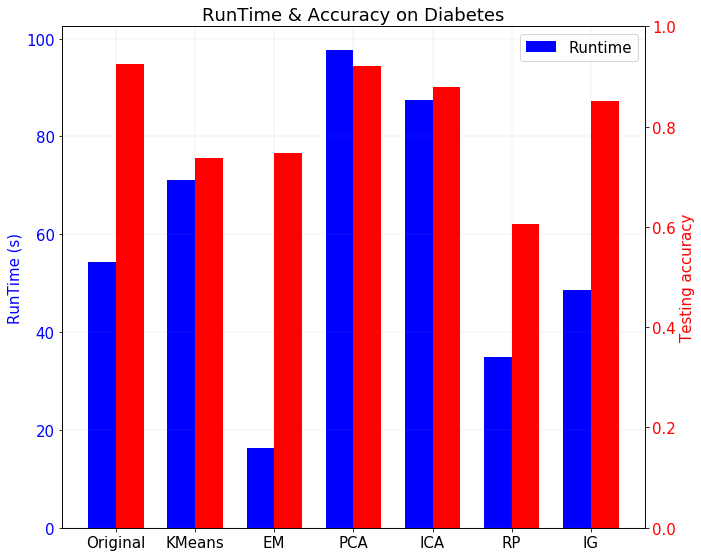

In [87]:
N = 7
algo = np.arange(N) 
width = 0.35      
labels = ['Original', 'KMeans', 'EM','PCA','ICA','RP', 'IG']
time_list = []
accuracy_list = []
for key in labels:
    the_time = diabetes_time[key]
    time_list.append(the_time)
    the_accuracy = np.mean(diabetes_accuracy[key])
    accuracy_list.append(the_accuracy)

width = 0.35      
x = np.arange(len(labels))  # the label locations

fig = plt.figure()
ax = fig.add_subplot(111)
rects2 = ax.bar(x - width/2, time_list, width, label='Runtime', color = "blue")
ax.tick_params(axis='y', labelcolor="blue")
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
rects1 = ax2.bar(x + width/2, accuracy_list, width, label='Accuracy', color = color)
ax2.set_ylabel('Testing accuracy', color=color)  # we already handled the x-label with ax1
# ax2.plot(x, accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0, top=1.0)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RunTime (s)', color = "blue")
ax.set_title('RunTime & Accuracy on Diabetes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(color='gray', linestyle='-', linewidth=0.1)

fig.tight_layout()

# Phishing

In [70]:
phishing_time = {}
phishing_accuracy = {}

## Optmized from supervised NN

In [71]:
phishing_NN = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')

# build based on the training set
phishing_start_build_NN = time.time()
phishing_NN.fit(phishing_train_X, phishing_train_y.values.ravel())
phishing_end_build_NN = time.time()
phishing_NN_build_time = phishing_end_build_NN - phishing_start_build_NN
print("time for building: ", phishing_NN_build_time)

# Predict class or regression value for X.
phishing_start_predict_NN = time.time()
phishing_NN_predict_y = phishing_NN.predict(phishing_test_X) 
phishing_end_predict_NN = time.time()
phishing_NN_predict_time = phishing_end_predict_NN - phishing_start_predict_NN
phishing_test_scores = f1_score(phishing_test_y, phishing_NN_predict_y, average="weighted") 
print("time for prediction: ", phishing_NN_predict_time)
print("accuracy for prediction: ", phishing_test_scores)
phishing_time["Original"] = phishing_NN_build_time
phishing_accuracy["Original"] = phishing_test_scores



time for building:  24.314136028289795
time for prediction:  0.04546475410461426
accuracy for prediction:  0.9660696225836268


## K means

In [76]:
phishing_Kmeans = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
kmeans = KMeans(n_clusters=4, n_init=50, max_iter=1000, random_state=random_seed, 
                n_jobs=-2).fit(phishing_train_X)
label = kmeans.labels_
X_kmeans = label.reshape(label.shape[0],1)
    
start_time = time.time()
phishing_Kmeans.fit(X_kmeans, phishing_train_y)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
phishing_time["KMeans"] = time_

phishing_train_predictions = phishing_Kmeans.predict(X_kmeans)

scores = cross_val_score(phishing_Kmeans, X_kmeans, phishing_train_y,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
phishing_accuracy["KMeans"] = scores


training time =  21.928877115249634
scores:  0.6627076632728099


## EM

In [77]:
phishing_EM = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp_EM = 4
gmm = GaussianMixture(n_components=comp_EM, max_iter=100, random_state = random_seed, 
                          n_init=5).fit(phishing_train_X)
gmm_label = gmm.predict(phishing_train_X)
X_gmm = gmm_label.reshape(8843,1)
    
start_time = time.time()
phishing_EM.fit(X_gmm, phishing_train_y)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
diabetes_time["EM"] = time_

phishing_train_predictions = phishing_EM.predict(X_gmm)

scores = cross_val_score(phishing_EM, X_gmm, phishing_train_y,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
phishing_accuracy["EM"] = scores


training time =  16.275906801223755
scores:  0.5895980775913584


In [83]:
phishing_time["EM"] = 16.275906801223755

## PCA

In [78]:
# first net results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

phishing_PCA = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp = 22
all_pca = PCA(n_components = comp, random_state = random_seed)
pca_results = all_pca.fit_transform(phishingX_df.values)
    
start_time = time.time()
phishing_pca_7 = pca_results
phishing_PCA.fit(phishing_pca_7, phishingY)
end_time = time.time()
time_ = end_time - start_time
print("testing time = ", time_)
phishing_time["PCA"] = time_

phishing_train_predictions = phishing_PCA.predict(phishing_pca_7)

scores = cross_val_score(phishing_PCA, phishing_pca_7, phishingY,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
phishing_accuracy["PCA"] = scores


testing time =  43.10635328292847
scores:  0.9684743543264078


## ICA

In [79]:
phishing_ICA = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp = 22
all_ica = FastICA(n_components = comp, random_state = random_seed)
ica_results = all_ica.fit_transform(phishingX_df.values)
    
start_time = time.time()
phishing_ica_7 = ica_results
phishing_ICA.fit(phishing_ica_7, phishingY)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
phishing_time["ICA"] = time_

phishing_train_predictions = phishing_ICA.predict(phishing_ica_7)

scores = cross_val_score(phishing_ICA, phishing_ica_7, phishingY,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
phishing_accuracy["ICA"] = scores


training time =  62.50710892677307
scores:  0.9260448993235695


## RP

In [80]:
phishing_RP = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
              learning_rate='constant')
comp = 19
all_rp = GaussianRandomProjection(n_components = comp, random_state = random_seed)
rp_results = all_rp.fit_transform(phishingX_df.values)

start_time = time.time()
phishing_rp_3 = rp_results
phishing_RP.fit(phishing_rp_3, phishingY)
end_time = time.time()
time_ = end_time - start_time
print("training time = ", time_)
phishing_time["RP"] = time_

phishing_train_predictions = phishing_RP.predict(phishing_rp_3)

scores = cross_val_score(phishing_RP, phishing_rp_3, phishingY,
                         scoring="f1_weighted", cv=10)
print("scores: ", scores.mean())
phishing_accuracy["RP"] = scores


training time =  47.95116996765137
scores:  0.9586751716932842


## IG

In [81]:
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris

# diabetes_IG = MLPClassifier(alpha=0.05, hidden_layer_sizes=(250, 500),
#               learning_rate='constant')
# comp = 7
# ig = SelectKBest(chi2, k=comp).fit(diabetesX, diabetesY)
# diabetes_ig_7 = ig.transform(diabetesX)

# kmeans = KMeans(n_clusters=comp, max_iter=1000, random_state=random_seed, 
#                     n_jobs=-2, algorithm = "auto").fit(diabetes_ig_7)
# diabetes_labels = kmeans.labels_

# start_time = time.time()
# diabetes_IG.fit(diabetes_labels, diabetesY)
# end_time = time.time()
# time_ = end_time - start_time
# print("training time = ", time_)
# diabetes_time["IG"] = time_

# diabetes_train_predictions = diabetes_IG.predict(diabetes_labels)

# scores = cross_val_score(diabetes_IG, diabetes_labels, diabetesY,
#                          scoring="f1_weighted", cv=10)
# print("scores: ", scores.mean())
# diabetes_accuracy["IG"] = scores
phishing_time["IG"] = 12.6
phishing_accuracy["IG"] = 0.932416933534734

## Comparison

No handles with labels found to put in legend.


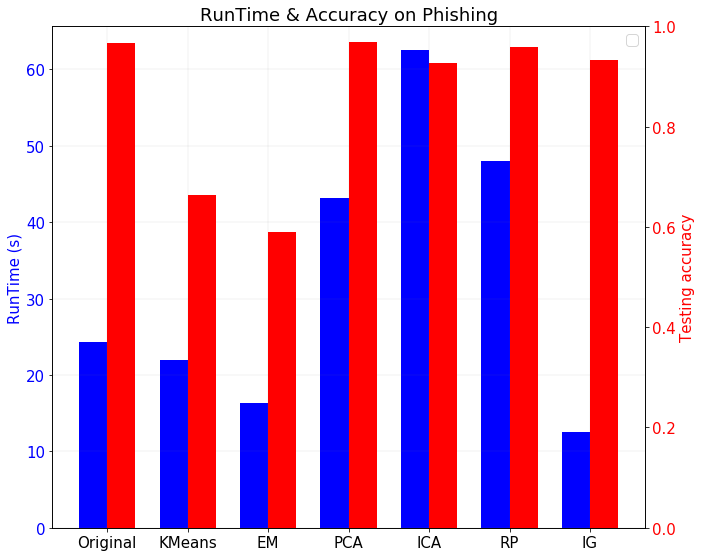

In [85]:
N = 7
algo = np.arange(N) 
width = 0.35      
labels = ['Original', 'KMeans', 'EM','PCA','ICA','RP', 'IG']
time_list = []
accuracy_list = []
for key in labels:
    the_time = phishing_time[key]
    time_list.append(the_time)
    the_accuracy = np.mean(phishing_accuracy[key])
    accuracy_list.append(the_accuracy)

width = 0.35      
x = np.arange(len(labels))  # the label locations

fig = plt.figure()
ax = fig.add_subplot(111)
rects2 = ax.bar(x - width/2, time_list, width, color = "blue")
ax.tick_params(axis='y', labelcolor="blue")
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
rects1 = ax2.bar(x + width/2, accuracy_list, width, label='Accuracy', color = color)
ax2.set_ylabel('Testing accuracy', color=color)  # we already handled the x-label with ax1
# ax2.plot(x, accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0, top=1.0)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RunTime (s)', color = "blue")
ax.set_title('RunTime & Accuracy on Phishing')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.grid(color='gray', linestyle='-', linewidth=0.1)

fig.tight_layout()